# Consulta de base de datos 
### Pandas - Sqlite

In [1]:
import pandas as pd
import sqlite3

In [2]:

connection = sqlite3.connect("base/chinook.sqlite")
connection.text_factory = str
albums = pd.read_sql_query("SELECT * from Album", connection)


In [3]:
albums

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [4]:
artistas = pd.read_sql_query("SELECT * from Artist", connection)
artistas


,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [5]:
data = albums

In [6]:
data.merge(artistas, on="ArtistId")

,AlbumId,Title,ArtistId,Name
0,1,For Those About To Rock We Salute You,1,AC/DC
1,4,Let There Be Rock,1,AC/DC
2,2,Balls to the Wall,2,Accept
3,3,Restless and Wild,2,Accept
4,5,Big Ones,3,Aerosmith
...,...,...,...,...
342,342,"Locatelli: Concertos for Violin, Strings and C...",271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
343,344,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
344,345,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,346,Mozart: Chamber Music,274,Nash Ensemble


In [7]:
tracks = pd.read_sql_query("SELECT * from Track", connection)
tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [8]:
genero = pd.read_sql_query("SELECT * from Genre", connection)
genero

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [15]:
tracks = tracks.merge(genero, on="GenreId")

In [16]:
tracks.keys()

Index(['TrackId', 'Name_x', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer',
       'Milliseconds', 'Bytes', 'UnitPrice', 'Name_y'],
      dtype='object')

In [17]:
tracks

,TrackId,Name_x,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Name_y
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock
...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical


<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='Name_y'>

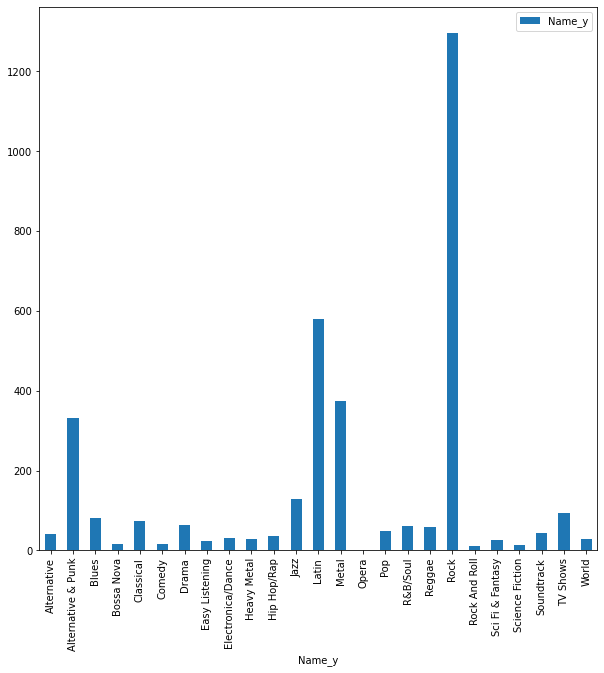

In [52]:
t = tracks.groupby(["Name_y"])["Name_y"].size()
print(t.__class__)
t.plot(kind="bar", figsize=(10,10), legend=True)

In [43]:
tracks.dtypes

TrackId           int64
Name_x           object
AlbumId           int64
MediaTypeId       int64
GenreId           int64
Composer         object
Milliseconds      int64
Bytes             int64
UnitPrice       float64
Name_y           object
dtype: object